# 21053273, Bealu Girma
# github link: https://github.com/bealu14/ML-Assignment

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
path = "dataset.csv"
data = pd.read_csv(path)

In [30]:
data.head(10)

,Predictor variable,response variable
0,9.1,0.99523
1,8.0,0.99007
2,9.1,0.99769
3,8.4,0.99386
4,6.9,0.99508
5,7.7,0.99630
6,15.6,1.00320
7,7.3,0.99768
8,7.0,0.99584
9,7.2,0.99609


In [32]:
data

,Predictor variable,response variable
0,9.1,0.99523
1,8.0,0.99007
2,9.1,0.99769
3,8.4,0.99386
4,6.9,0.99508
...,...,...
95,7.8,0.99620
96,10.2,0.99760
97,6.1,0.99464
98,7.3,0.99830


In [33]:
X = data['Predictor variable']
Y = data['response variable']

In [34]:
m_numpy, b_numpy = np.polyfit(X, Y, 1)

print(f"Linear regression with NumPy. Slope: {m_numpy}. Intercept: {b_numpy}")

Linear regression with NumPy. Slope: 0.000777771124184783. Intercept: 0.9903497091968216


In [35]:
def pred_numpy(m, b, X):
    Y = m * X + b
    
    
    return Y

In [36]:
X_pred = np.array([50, 120, 280])
Y_pred_numpy = pred_numpy(m_numpy, b_numpy, X_pred)

print(f"Predictor variable:\n{X_pred}")
print(f"Predictions of response variable using NumPy linear regression:\n{Y_pred_numpy}")

Predictor variable:
[ 50 120 280]
Predictions of response variable using NumPy linear regression:
[1.02923827 1.08368224 1.20812562]


In [38]:
X_norm = (X - np.mean(X))/np.std(X)
Y_norm = (Y - np.mean(Y))/np.std(Y)

In [39]:
def E(m, b, X, Y):
    return 1/(2*len(Y))*np.sum((m*X + b - Y)**2)

In [55]:
 def dEdm(m, b, X, Y):
    res = 1/len(Y)*np.dot(m*X + b - Y, X)
    
    return res
    

def dEdb(m, b, X, Y):
   
    res = 1/len(Y)*np.sum(m*X + b - Y)
    
    return res


print(dEdm(0, 0, X_norm, Y_norm))
print(dEdb(0, 0, X_norm, Y_norm))
print(dEdm(1, 5, X_norm, Y_norm))
print(dEdb(1, 5, X_norm, Y_norm))

-0.655064426354388
1.6822723769571725e-13
0.3449355736456087
5.000000000000169


# 1)Use linear regression to fit a straight line to the given database. Set your learning rate to 0.5. What are the cost function value and learning parameters values after convergence? Also, mention the convergence criteria you used.

In [56]:
def dEdm(m, b, X, Y):
    return 2/len(Y) * np.dot((m*X + b - Y), X)

def dEdb(m, b, X, Y):
    return 2/len(Y) * np.sum(m*X + b - Y)


def batch_gradient_descent(X, Y, learning_rate, iterations):
    m = 0
    b = 0
    cost_history = []

    for i in range(iterations):
        
        m = m - learning_rate * dEdm(m, b, X, Y)
        b = b - learning_rate * dEdb(m, b, X, Y)

        
        cost = np.mean((m*X + b - Y)**2)
        cost_history.append(cost)

    return m, b, cost_history


learning_rate_batch = 0.5
iterations_batch = 1000


m_batch, b_batch, cost_history_batch = batch_gradient_descent(X_norm, Y_norm, learning_rate_batch, iterations_batch)


print("Batch Gradient Descent - Coefficients:")
print("Slope (m):", m_batch)
print("Intercept (b):", b_batch)


Batch Gradient Descent - Coefficients:
Slope (m): 0.655064426354388
Intercept (b): -1.6777079725471822e-13


# 5 Test your regression model with the learning rates Ir = 0.005, Ir = 0.5, Ir = 5 For each learning rate, plot a graph showing how the cost function changes every iteration and write your observation.

In [57]:
def dEdm(m, b, X, Y):
    return 2/len(Y) * np.dot((m*X + b - Y), X)

def dEdb(m, b, X, Y):
    return 2/len(Y) * np.sum(m*X + b - Y)


def batch_gradient_descent(X, Y, learning_rate, iterations):
    m = 0
    b = 0
    cost_history = []

    for i in range(iterations):
        
        m = m - learning_rate * dEdm(m, b, X, Y)
        b = b - learning_rate * dEdb(m, b, X, Y)

        
        cost = np.mean((m*X + b - Y)**2)
        cost_history.append(cost)

    return m, b, cost_history


learning_rate_batch = 0.05
iterations_batch = 1000


m_batch, b_batch, cost_history_batch = batch_gradient_descent(X_norm, Y_norm, learning_rate_batch, iterations_batch)


print("Batch Gradient Descent - Coefficients:")
print("Slope (m):", m_batch)
print("Intercept (b):", b_batch)

Batch Gradient Descent - Coefficients:
Slope (m): 0.6550644263543874
Intercept (b): -1.6777003397639057e-13


# 4 Plot the given dataset on a graph and also print the straight line you obtained in question 1 to show how it fits the data.

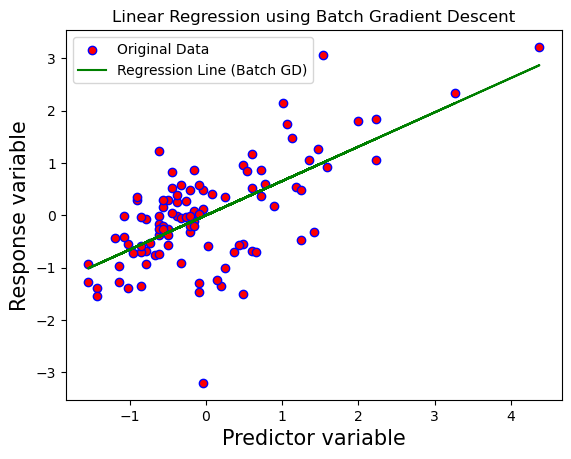

In [58]:
plt.scatter(X_norm, Y_norm, color="r", edgecolor="b", label="Original Data")
plt.plot(X_norm, m_batch*X_norm + b_batch, color="g", label="Regression Line (Batch GD)")
plt.xlabel('Predictor variable', fontsize=15)
plt.ylabel("Response variable", fontsize=15)
plt.title("Linear Regression using Batch Gradient Descent")
plt.legend()
plt.show()

# 3. Plot cost function v/ s iteration graph for the model in question 1.

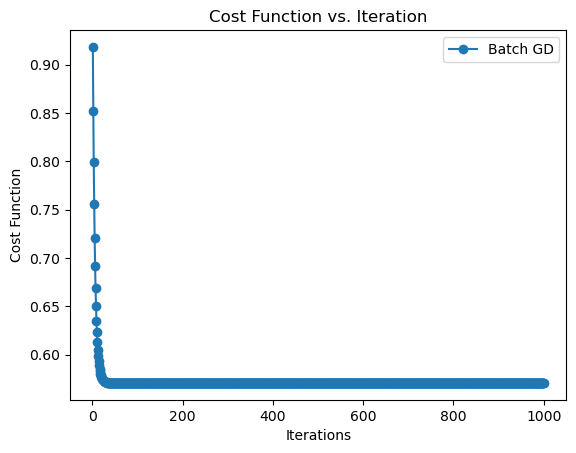

In [59]:
plt.plot(range(1, iterations_batch + 1), cost_history_batch, label='Batch GD', marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Iteration')
plt.legend()
plt.show()

In [61]:

def dEdm(m, b, x, y):
    return 2 * x * (m*x + b - y)

# Function to calculate the gradient of the cost with respect to b
def dEdb(m, b, x, y):
    return 2 * (m*x + b - y)

# Function to perform stochastic gradient descent
def stochastic_gradient_descent(X, Y, learning_rate, iterations):
    m = 0
    b = 0
    cost_history = []

    for i in range(iterations):
        for j in range(len(Y)):
            # Update parameters using stochastic gradient descent
            m = m - learning_rate * dEdm(m, b, X[j], Y[j])
            b = b - learning_rate * dEdb(m, b, X[j], Y[j])

        # Calculate and store the cost
        cost = np.mean((m*X + b - Y)**2)
        cost_history.append(cost)

    return m, b, cost_history

# Set hyperparameters
learning_rate_stochastic = 0.01
iterations_stochastic = 1000

# Perform linear regression using stochastic gradient descent
m_stochastic, b_stochastic, cost_history_stochastic = stochastic_gradient_descent(X_norm, Y_norm, learning_rate_stochastic, iterations_stochastic)

# Display the results
print("Stochastic Gradient Descent - Coefficients:")
print("Slope (m):", m_stochastic)
print("Intercept (b):", b_stochastic)



Stochastic Gradient Descent - Coefficients:
Slope (m): 0.633266587828981
Intercept (b): 0.045941712422476744


In [62]:

# Function to calculate the gradient of the cost with respect to m
def dEdm(m, b, X, Y):
    return 2/len(Y) * np.dot((m*X + b - Y), X)

# Function to calculate the gradient of the cost with respect to b
def dEdb(m, b, X, Y):
    return 2/len(Y) * np.sum(m*X + b - Y)

# Function to perform mini-batch gradient descent
def mini_batch_gradient_descent(X, Y, learning_rate, batch_size, iterations):
    m = 0
    b = 0
    cost_history = []

    for i in range(iterations):
        # Randomly shuffle the data
        permutation = np.random.permutation(len(Y))
        X_shuffled = X[permutation]
        Y_shuffled = Y[permutation]

        # Update parameters using mini-batch gradient descent
        for j in range(0, len(Y), batch_size):
            X_batch = X_shuffled[j:j+batch_size]
            Y_batch = Y_shuffled[j:j+batch_size]
            m = m - learning_rate * dEdm(m, b, X_batch, Y_batch)
            b = b - learning_rate * dEdb(m, b, X_batch, Y_batch)

        # Calculate and store the cost
        cost = np.mean((m*X + b - Y)**2)
        cost_history.append(cost)

    return m, b, cost_history

# Set hyperparameters
learning_rate_mini_batch = 0.5
batch_size = 20
iterations_mini_batch = 500

# Perform linear regression using mini-batch gradient descent
m_mini_batch, b_mini_batch, cost_history_mini_batch = mini_batch_gradient_descent(X_norm, Y_norm, learning_rate_mini_batch, batch_size, iterations_mini_batch)

# Display the results
print("Mini-Batch Gradient Descent - Coefficients:")
print("Slope (m):", m_mini_batch)
print("Intercept (b):", b_mini_batch)




Mini-Batch Gradient Descent - Coefficients:
Slope (m): 0.7143332703229924
Intercept (b): -0.1271726088974767


In [63]:
# Perform linear regression using mini-batch gradient descent
learning_rate_mini_batch = 0.1
batch_size_mini_batch = 20
iterations_mini_batch = 1000
m_mini_batch, b_mini_batch, cost_history_mini_batch = mini_batch_gradient_descent(X_norm, Y_norm, learning_rate_mini_batch, batch_size_mini_batch, iterations_mini_batch)


# 6. Choose a suitable learning rate, then implement stochastic and min-batch gradient descent, plot the cost function against iteration, and observe how your cost function changes compared to batch gradient descent.

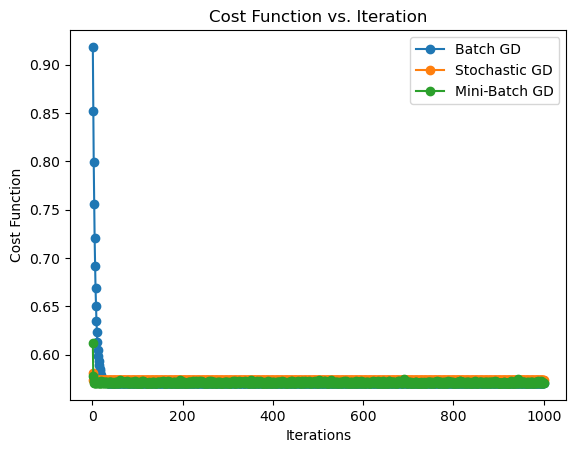

In [64]:
plt.plot(range(1, iterations_batch + 1), cost_history_batch, label='Batch GD', marker='o')
plt.plot(range(1, iterations_stochastic + 1), cost_history_stochastic, label='Stochastic GD', marker='o')
plt.plot(range(1, iterations_mini_batch + 1), cost_history_mini_batch, label='Mini-Batch GD', marker='o')

plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Iteration')
plt.legend()
plt.show()

# 2The cost function that we are using in this assignment is different than the one we used in class. Can you think of the advantage of averaging the cost?


In [ ]:
Averaging the cost function provides key advantages in optimization and model training. It smoothens the optimization 
landscape, aiding stable convergence during gradient descent and making the process less prone to local minima.
Additionally, it enhances robustness by reducing the impact of outliers, promotes better generalization by mitigating 
sensitivity to training data variations, and acts as implicit regularization, discouraging overfitting. 
Overall, averaging the cost function improves stability, robustness, and generalization in model optimization.